In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = r"C:\Users\HP\ML main\dogs_vs_cats\test"
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

def load_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (150, 150))
            images.append(img)
            labels.append(label)
    return images, labels

cat_images, cat_labels = load_images(cat_dir, 0)
dog_images, dog_labels = load_images(dog_dir, 1)

images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (4000, 150, 150, 3)
Training labels shape: (4000,)
Test data shape: (1000, 150, 150, 3)
Test labels shape: (1000,)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

C:\Users\HP\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\HP\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 475ms/step - accuracy: 0.5147 - loss: 48.0958 - val_accuracy: 0.5180 - val_loss: 0.6918
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 468ms/step - accuracy: 0.5230 - loss: 0.6932 - val_accuracy: 0.5420 - val_loss: 0.6874
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 477ms/step - accuracy: 0.5231 - loss: 0.6909 - val_accuracy: 0.5200 - val_loss: 0.6925
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 465ms/step - accuracy: 0.5227 - loss: 0.6915 - val_accuracy: 0.5290 - val_loss: 0.6874
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 463ms/step - accuracy: 0.5234 - loss: 0.6916 - val_accuracy: 0.5080 - val_loss: 0.6894
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 469ms/step - accuracy: 0.5319 - loss: 0.6960 - val_accuracy: 0.5280 - val_loss: 0.6875
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 466ms/step - accuracy: 0.5278 - loss: 0.6945 - val_accuracy: 0.5180 - val_loss: 0.6940
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 465ms/step - accuracy: 0.5254 - loss: 0.6934 - va

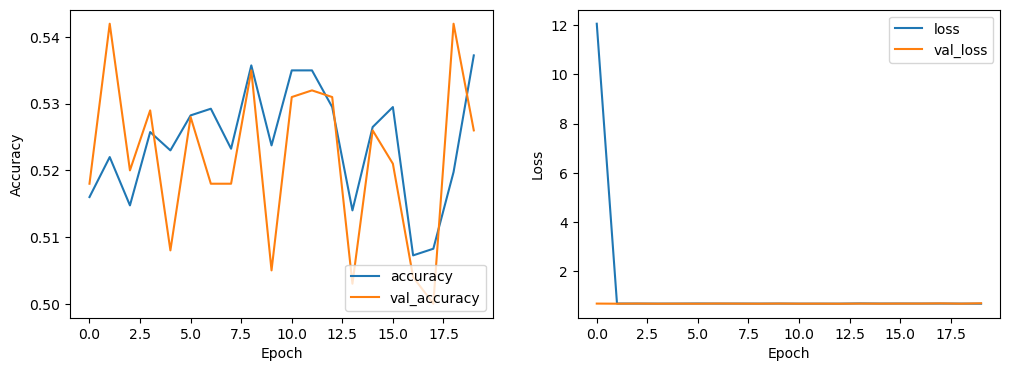

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test)
)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [ ]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    prediction = model.predict(img)
    return 'Dog' if prediction[0][0] > 0.5 else 'Cat'

result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_cat.jpg')
print(f'The image is classified as: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The image is classified as: Cat


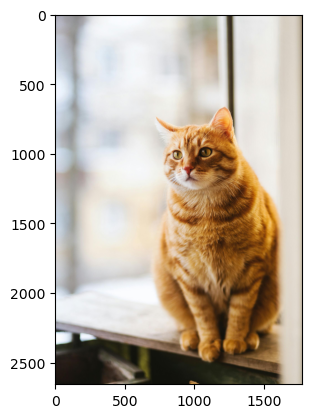

In [ ]:
test_cat=cv2.imread(r'C:\Users\HP\ML main\dogs_vs_cats\test_cat.jpg')
test_cat=cv2.cvtColor(test_cat,cv2.COLOR_BGR2RGB)
plt.imshow(test_cat)

In [ ]:
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog.jpg')
print(f'The image is classified as: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image is classified as: Cat


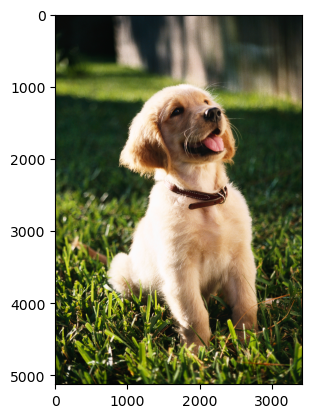

In [ ]:
test_dog=cv2.imread(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog.jpg')
test_dog=cv2.cvtColor(test_dog,cv2.COLOR_BGR2RGB)
plt.imshow(test_dog)

In [ ]:
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog2.jpg')
print(f'The image is classified as: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The image is classified as: Cat


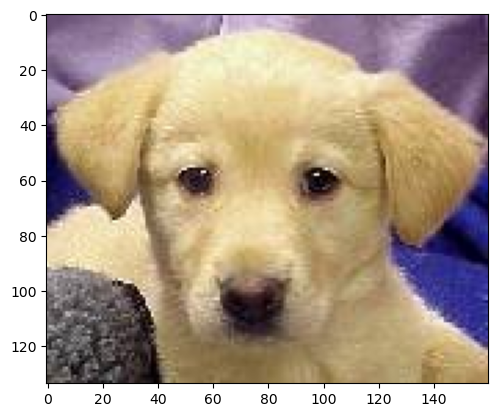

In [ ]:
test_dog2=cv2.imread(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog2.jpg')
test_dog2=cv2.cvtColor(test_dog2,cv2.COLOR_BGR2RGB)
plt.imshow(test_dog2)

In [ ]:
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog3.jpg')
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image is classified as: Cat


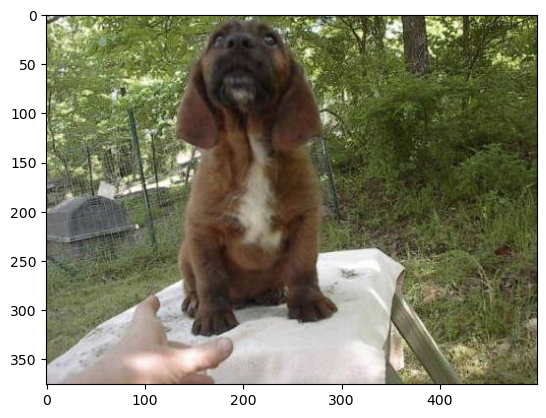

In [ ]:
test_dog3=cv2.imread(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog3.jpg')
test_dog3=cv2.cvtColor(test_dog3,cv2.COLOR_BGR2RGB)
plt.imshow(test_dog3)

In [ ]:
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_cat2.jpg')
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The image is classified as: Cat


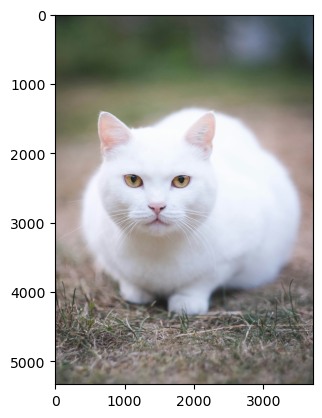

In [ ]:
test_cat2=cv2.imread(r'C:\Users\HP\ML main\dogs_vs_cats\test_cat2.jpg')
test_cat2=cv2.cvtColor(test_cat2,cv2.COLOR_BGR2RGB)
plt.imshow(test_cat2)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step


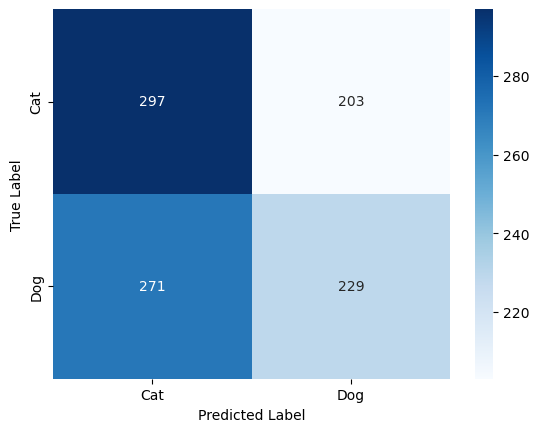

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
